<a href="https://colab.research.google.com/github/TrinhBaThinh-257275/BTVN-AI/blob/nopbai/VNMoney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Tien/

/content/drive/MyDrive/Colab Notebooks/BTVN/Tien


In [ ]:

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:

training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Tien/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 977 images belonging to 11 classes.


In [ ]:

  validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Tien/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 115 images belonging to 11 classes.


In [ ]:
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [ ]:
validation.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [ ]:

model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
 
model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
31/31 [==============================] - 332s 11s/step - loss: 2.9799 - accuracy: 0.1116 - val_loss: 2.4127 - val_accuracy: 0.0870
Epoch 2/500
31/31 [==============================] - 160s 5s/step - loss: 2.2239 - accuracy: 0.1566 - val_loss: 2.3029 - val_accuracy: 0.1304
Epoch 3/500
31/31 [==============================] - 162s 5s/step - loss: 2.1280 - accuracy: 0.2129 - val_loss: 2.2212 - val_accuracy: 0.1652
Epoch 4/500
31/31 [==============================] - 163s 5s/step - loss: 2.0108 - accuracy: 0.2549 - val_loss: 2.0487 - val_accuracy: 0.3043
Epoch 5/500
31/31 [==============================] - 161s 5s/step - loss: 1.7475 - accuracy: 0.3726 - val_loss: 2.2049 - val_accuracy: 0.2435
Epoch 6/500
31/31 [==============================] - 160s 5s/step - loss: 1.5906 - accuracy: 0.4237 - val_loss: 1.9027 - val_accuracy: 0.2957
Epoch 7/500
31/31 [==============================] - 163s 5s/step - loss: 1.4647 - accuracy: 0.4647 - val_loss: 1.5670 - val_accuracy: 0.4696
Epoch

In [ ]:
model.save("VNMoney.h5")

In [ ]:
model_CNN=load_model('VNMoney.h5')

NAM TRAM NGAN DONG


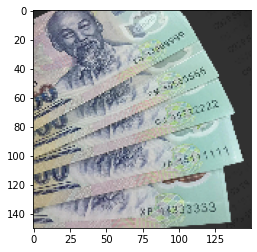

NAM TRAM NGAN DONG


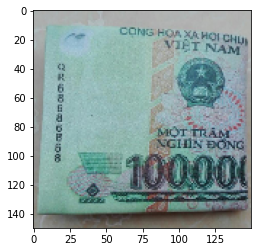

HAI TRAM DONG


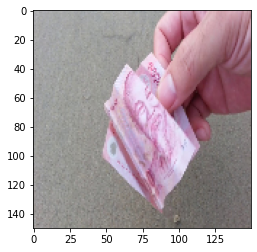

HAI TRAM DONG


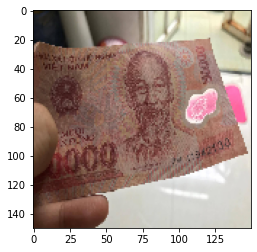

HAI CHUC NGAN DONG


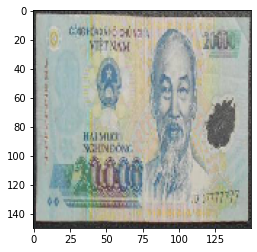

HAI NGAN DONG


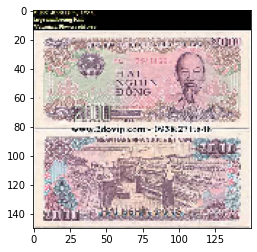

HAI NGAN DONG


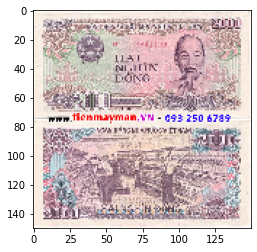

HAI NGAN DONG


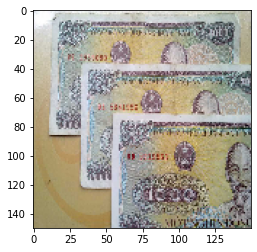

HAI TRAM NGAN DONG


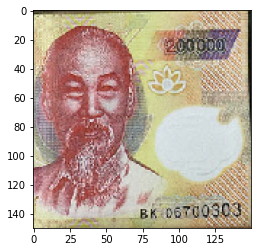

HAI CHUC NGAN DONG


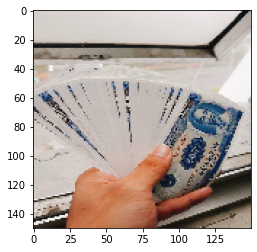

HAI CHUC NGAN DONG


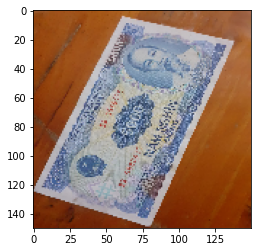

MOT TRAM NGAN DONG


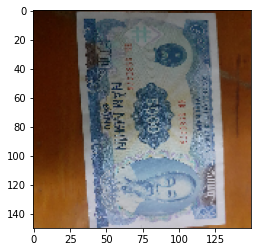

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Tien/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='MOT TRAM NGAN DONG'
  if round(result[0][1])==1:
    prediction='MUOI NGAN DONG'
  if round(result[0][2])==1:
    prediction='MOT NGAN DONG'
  if round(result[0][3])==1:
    prediction='HAI TRAM NGAN DONG'
  if round(result[0][4])==1:
    prediction='HAI TRAM DONG'
  if round(result[0][5])==1:
    prediction='HAI CHUC NGAN DONG'
  if round(result[0][6])==1:
    prediction='HAI NGAN DONG'
  if round(result[0][7])==1:
    prediction='NAM TRAM NGAN DONG'
  if round(result[0][8])==1:
    prediction='NAM TRAM DONG'
  if round(result[0][9])==1:
    prediction='NAM CHUC NGAN DONG'
  if round(result[0][9])==1:
    prediction='NAM NGAN DONG'
  print(prediction)
  plt.show()